In [1]:
#import libraries and modules
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
np.__version__


'1.19.2'

In [3]:
sklearn.__version__

'0.23.2'

In [4]:
#load data in to x and y variables:

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print (type(diabetes_X))
print (diabetes_X.shape)
print(len(diabetes_X))
print(diabetes_X[:5])
print(diabetes_y.shape)
print(diabetes_y[:5])

<class 'numpy.ndarray'>
(442, 10)
442
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
(442,)
[151.  75. 141. 206. 135.]


In [5]:
print(diabetes_X[0:5,2])
print(type(diabetes_X[0:5,2]))
print (diabetes_X[0:5,2].shape)

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
<class 'numpy.ndarray'>
(5,)


In [6]:
#Use only one feature
#What feature is this?  According to the User Guide, this is body mass index.

BMI_X = diabetes_X[:, np.newaxis, 2]

In [7]:
print(BMI_X[:5])
print(BMI_X.shape)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]
(442, 1)


In [8]:
#Split the features and targets into training/testing sets
BMI_X_train = BMI_X[:-20]
print(BMI_X_train.shape)
BMI_X_test = BMI_X[-20:]
print(BMI_X_test.shape)


(422, 1)
(20, 1)


In [9]:
diabetes_y_train = diabetes_y[:-20].reshape(-1,1)
diabetes_y_test = diabetes_y[-20:].reshape(-1,1)
print(diabetes_y_test[0:5])
print(diabetes_y_test.shape)

[[233.]
 [ 91.]
 [111.]
 [152.]
 [120.]]
(20, 1)


In [10]:
#Create a linear regression estimator
regr = linear_model.LinearRegression()

In [11]:
#Train the model
regr.fit(BMI_X_train, diabetes_y_train)

LinearRegression()

In [12]:
#Make predictions using the test set
diabetes_y_pred = regr.predict(BMI_X_train)
print(diabetes_y_pred[0:10])

[[210.80457868]
 [104.6239487 ]
 [194.62467316]
 [142.03998022]
 [118.78136603]
 [114.73638965]
 [108.66892508]
 [151.14117707]
 [210.80457868]
 [189.56845268]]


In [13]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[938.23786125]]


In [14]:
print('Mean squared error: %.2f' %mean_squared_error(diabetes_y_train, diabetes_y_pred))
rmse = np.sqrt(mean_squared_error(diabetes_y_train, diabetes_y_pred))
print('Root MSE: %.2f' %rmse)

Mean squared error: 3955.02
Root MSE: 62.89


<function matplotlib.pyplot.show(close=None, block=None)>

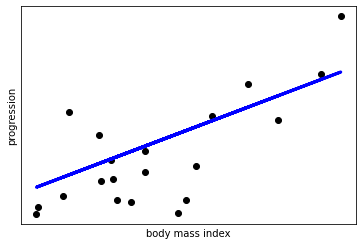

In [15]:
plt.scatter(BMI_X_test, diabetes_y_test, color='black')
plt.plot(BMI_X_test, regr.predict(BMI_X_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('body mass index')
plt.ylabel('progression')

plt.show

In [16]:
#let's compare this with Average Blood Pressure
ABP_X = diabetes_X[:, np.newaxis, 3]

In [17]:
print(ABP_X[:5])
print(ABP_X.shape)

[[ 0.02187235]
 [-0.02632783]
 [-0.00567061]
 [-0.03665645]
 [ 0.02187235]]
(442, 1)


In [18]:
ABP_X_train = ABP_X[:-20]
print(ABP_X_train.shape)
ABP_X_test = ABP_X[-20:]
print(ABP_X_test.shape)

(422, 1)
(20, 1)


In [19]:
regr.fit(ABP_X_train, diabetes_y_train)

LinearRegression()

In [20]:
diabetes_y_pred = regr.predict(ABP_X_test)
print(diabetes_y_pred)

[[190.62399804]
 [173.53233807]
 [139.34901813]
 [ 95.39903534]
 [184.1128894 ]
 [149.11568097]
 [215.04065514]
 [136.90735242]
 [117.37402673]
 [168.64900665]
 [149.11568097]
 [132.024021  ]
 [158.88234381]
 [124.69902387]
 [117.37402673]
 [195.50732946]
 [105.16569818]
 [165.39345238]
 [153.99901239]
 [ 95.39903534]]


In [21]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[709.19471785]]


In [22]:
print('Mean squared error: %.2f' %mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 4058.41


<function matplotlib.pyplot.show(close=None, block=None)>

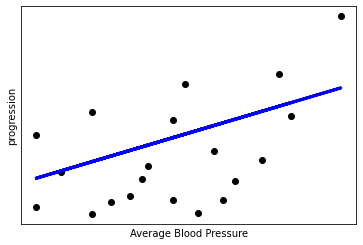

In [23]:
plt.scatter(ABP_X_test, diabetes_y_test, color='black')
plt.plot(ABP_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('Average Blood Pressure')
plt.ylabel('progression')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

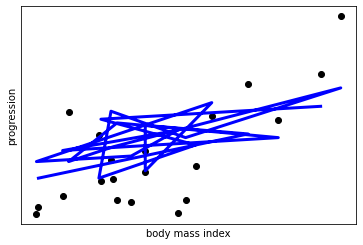

In [24]:
plt.scatter(BMI_X_test, diabetes_y_test, color='black')
plt.plot(BMI_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('body mass index')
plt.ylabel('progression')

plt.show

In [25]:
# Notice the coefficient for BMI is higher and the mean squared error is lower than blood pressure.